# Lab 7 - Applying Lab7Testing to another DF.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
# %matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("../labData/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [11]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [9]:
df = df.dropna()

<Axes: xlabel='AHD', ylabel='count'>

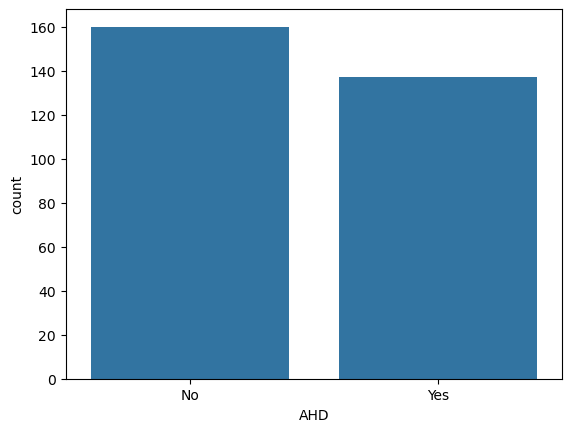

In [10]:
sns.countplot(df, x = "AHD")
# Quite balanced

Unlike the one from Lab7Testing, this dataset isn't all integers, so we should convert them to integers where possible.

In [27]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

<Axes: xlabel='Thal', ylabel='count'>

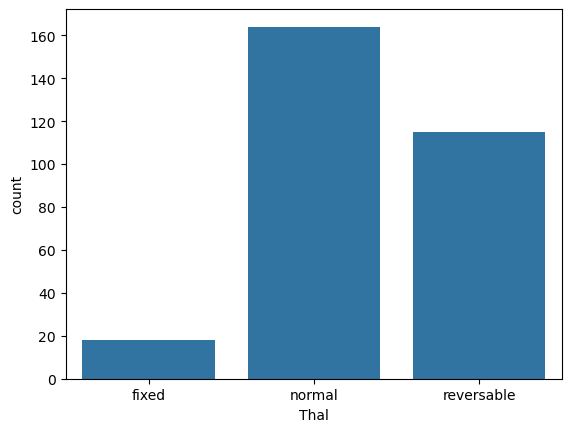

In [28]:
sns.countplot(df, x = "Thal")

<Axes: xlabel='ChestPain', ylabel='count'>

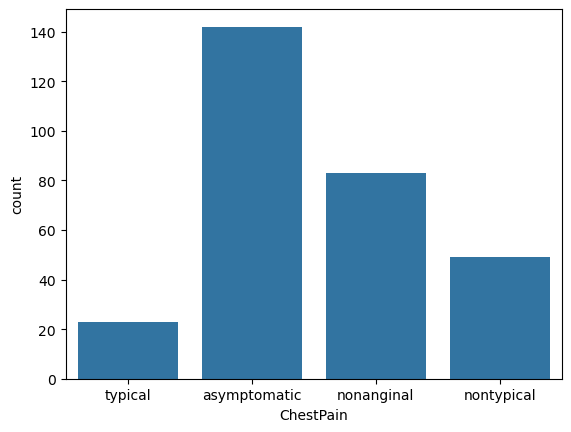

In [39]:
sns.countplot(df, x = "ChestPain")

In [29]:
le = LabelEncoder()

In [ ]:
df["Thal"] = le.fit_transform(df["Thal"])
df["AHD"] = le.fit_transform(df["AHD"])
df["ChestPain"] = le.fit_transform(df["ChestPain"])

In [41]:
X = df.drop(columns = "AHD", axis = 1)
y = df['AHD']

In [42]:
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [43]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 297, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Random state is the seed for RNG.

In [45]:
X_train.shape

(237, 13)

In [46]:
X_test.shape

(60, 13)

In [47]:
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
print(X_train.min())
X_train.max()

-3.342290008692299


np.float64(6.033787158724725)

In [52]:
gnb = GaussianNB()

In [54]:
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred = gnb.predict(X_test)

In [56]:
gnb_acc = accuracy_score(y_pred, y_test)
gnb_acc

0.9166666666666666

In [57]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [58]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_pred, y_test) 
knn_acc

0.85

In [59]:
sc = StandardScaler()

In [60]:
X = sc.fit_transform(X)

In [62]:
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
gnb = GaussianNB()

In [65]:
gnb_kf = np.mean(cross_val_score(gnb, X, y, cv = kf))

In [66]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [67]:
gnb_skf = np.mean(cross_val_score(gnb, X, y, cv = skf))

In [68]:
models = pd.DataFrame({
    "model" : ["GNB", "KNN", "GNB-KF", "GNB-SKF"],
    "accuracy" : [gnb_acc, knn_acc, gnb_kf, gnb_skf]
})

In [69]:
models.sort_values(by = "accuracy", ascending = False)

,model,accuracy
0,GNB,0.916667
1,KNN,0.850000
2,GNB-KF,0.831356
3,GNB-SKF,0.814463


<Axes: xlabel='accuracy', ylabel='model'>

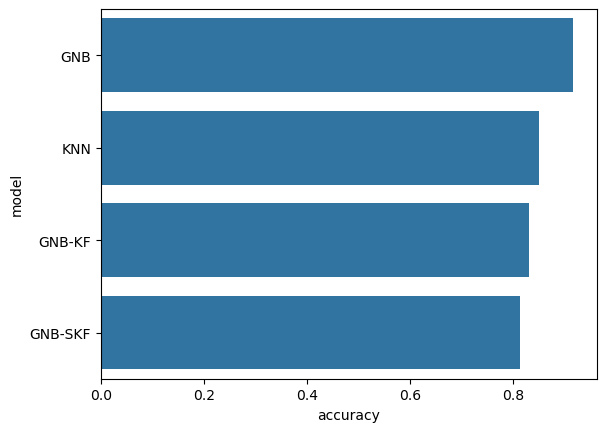

In [70]:
sns.barplot(models, x = "accuracy", y = "model")